In [ ]:
# prompt: mount the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install torch torchvision
!git clone https://github.com/JingyunLiang/SwinIR.git
%cd SwinIR

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from models.network_swinir import SwinIR
import torch

# Define SwinIR-M for x4 SR (match the pretrained model config)
model = SwinIR(
    upscale=4,
    in_chans=3,
    img_size=64,
    window_size=8,
    img_range=1.0,
    depths=[6, 6, 6, 6, 6, 6],        # <-- SwinIR-M has 6 stages
    embed_dim=180,                   # <-- Match SwinIR-M embed_dim
    num_heads=[6, 6, 6, 6, 6, 6],    # <-- Match SwinIR-M heads
    mlp_ratio=2,
    upsampler='pixelshuffle',
    resi_connection='1conv'
)

# Load pretrained weights
checkpoint = torch.load('/content/drive/MyDrive/Project/001_classicalSR_DF2K_s64w8_SwinIR-M_x4.pth')
model.load_state_dict(checkpoint['params'], strict=True)

# Use device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

print("✅ SwinIR-M x4 model loaded successfully.")

/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


✅ SwinIR-M x4 model loaded successfully.


# Task
Load the SwinIR model from "/content/drive/MyDrive/Project/001_classicalSR_DF2K_s64w8_SwinIR-M_x4.pth".

## Load image

### Subtask:
Load the image that you want to upscale.


**Reasoning**:
Import the necessary library for image loading and load the image.



In [ ]:
from PIL import Image
import numpy as np

# Specify the path to the image file
image_path = '/content/drive/MyDrive/Project/low_resolution_image.png' # Replace with your image path

# Load the image
img = Image.open(image_path).convert('RGB')
img = np.array(img)
print(f"✅ Image loaded successfully from {image_path}. Shape: {img.shape}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Project/low_resolution_image.png'

**Reasoning**:
The previous command failed because the image file was not found. I need to load the image from a valid path. I will use the example low-resolution image provided in the cloned repository.



In [ ]:
# Specify the path to the example low-resolution image
image_path = 'testsets/Set5/baby_GT.png' # Using an example image from the repository

# Load the image
img = Image.open(image_path).convert('RGB')
img = np.array(img)
print(f"✅ Image loaded successfully from {image_path}. Shape: {img.shape}")

FileNotFoundError: [Errno 2] No such file or directory: 'testsets/Set5/baby_GT.png'

**Reasoning**:
The previous command failed because the image path was still incorrect. I need to find the correct path to an example image within the cloned SwinIR repository. I will list the files in the `testsets` directory to identify a valid image path.



In [ ]:
import os
print(os.listdir('testsets'))

['classic5', 'Set12', 'Set5', 'McMaster', 'RealSRSet+5images']


**Reasoning**:
I have identified the subdirectories within `testsets`. I will now list the contents of the `Set5` directory to find an image file.



In [ ]:
print(os.listdir('testsets/Set5'))

['LR_bicubic', 'HR']


**Reasoning**:
I have identified the subdirectories within `testsets/Set5`. The images are likely in the 'HR' directory. I will now list the contents of the `HR` directory to find an image file.



In [ ]:
print(os.listdir('testsets/Set5/HR'))

['butterfly.png', 'bird.png', 'head.png', 'woman.png', 'baby.png']


**Reasoning**:
I have found image files in the 'testsets/Set5/HR' directory. I will load one of these images.



In [ ]:
# Specify the path to an example image
image_path = 'testsets/Set5/HR/baby.png'

# Load the image
img = Image.open(image_path).convert('RGB')
img = np.array(img)
print(f"✅ Image loaded successfully from {image_path}. Shape: {img.shape}")

✅ Image loaded successfully from testsets/Set5/HR/baby.png. Shape: (512, 512, 3)


## Preprocess image

### Subtask:
Preprocess the image to be compatible with the model. This might involve resizing, normalizing, or converting color spaces.


**Reasoning**:
Preprocess the image by converting it to a PyTorch tensor, normalizing it, rearranging its dimensions, adding a batch dimension, and moving it to the specified device.



In [ ]:
import torch
import numpy as np

# Convert image from NumPy array to PyTorch tensor
img_tensor = torch.from_numpy(img).float()

# Normalize the image tensor by dividing by 255.0
img_tensor /= 255.0

# Rearrange dimensions from HWC to NCHW
img_tensor = img_tensor.permute(2, 0, 1).unsqueeze(0)

# Move the image tensor to the device
img_tensor = img_tensor.to(device)

print("✅ Image preprocessed and ready for model input.")
print(f"Processed image tensor shape: {img_tensor.shape}")

✅ Image preprocessed and ready for model input.
Processed image tensor shape: torch.Size([1, 3, 512, 512])


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Project/reds_split_dataset.zip'
extract_path = '/content/reds_split_dataset'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ File unzipped successfully to {extract_path}")

✅ File unzipped successfully to /content/reds_split_dataset


# Task
Apply the SwinIR model from "/content/drive/MyDrive/Project/001_classicalSR_DF2K_s64w8_SwinIR-M_x4.pth" to the images in the "lr" subfolders within the "train", "val", and "test" directories of the dataset located at "/content/drive/MyDrive/Project/reds_split_dataset.zip".

## Identify image paths

### Subtask:
Traverse the specified directories (`train`, `val`, `test`) to find the low-resolution image files.


**Reasoning**:
I will traverse the specified directories to find the low-resolution image files and store their paths in a list.



In [ ]:
import os

# Define the base directory
base_dir = '/content/reds_split_dataset'

# Define the subdirectories to process
subdirs = ['train', 'val', 'test']

# Initialize an empty list to store image paths
lr_image_paths = []

# Iterate through each subdirectory
for subdir in subdirs:
    lr_dir = os.path.join(base_dir, subdir, 'lr')
    # Use os.walk to traverse the 'lr' subfolder
    for root, _, files in os.walk(lr_dir):
        for file in files:
            # Check if the file is an image (you can add more extensions if needed)
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                lr_image_paths.append(image_path)

print(f"✅ Found {len(lr_image_paths)} low-resolution images.")

✅ Found 24000 low-resolution images.


## Load and preprocess images

### Subtask:
For each low-resolution image found, load it and preprocess it to be compatible with the SwinIR model (similar to the previous preprocessing step).


**Reasoning**:
Iterate through the identified image paths, load each image, preprocess it into a PyTorch tensor, and store the processed tensors.



In [ ]:
from PIL import Image
import numpy as np
import torch

preprocessed_images = {}

for image_path in lr_image_paths:
    # Load the image
    img = Image.open(image_path).convert('RGB')
    img = np.array(img)

    # Convert image from NumPy array to PyTorch tensor
    img_tensor = torch.from_numpy(img).float()

    # Normalize the image tensor by dividing by 255.0
    img_tensor /= 255.0

    # Rearrange dimensions from HWC to NCHW
    img_tensor = img_tensor.permute(2, 0, 1).unsqueeze(0)

    # Move the image tensor to the device
    img_tensor = img_tensor.to(device)

    # Store the preprocessed image tensor
    preprocessed_images[image_path] = img_tensor

print(f"✅ Preprocessed {len(preprocessed_images)} images.")

✅ Preprocessed 24000 images.


## Apply swinir model

### Subtask:
Pass the preprocessed low-resolution image through the loaded SwinIR model to obtain the super-resolved output.


**Reasoning**:
Iterate through the preprocessed images and apply the loaded SwinIR model to each, storing the results.



In [ ]:
super_resolved_images = {}

# Iterate through each preprocessed image tensor
for image_path, img_tensor in preprocessed_images.items():
    # Pass the image tensor through the model
    with torch.no_grad():  # Disable gradient calculation for inference
        output = model(img_tensor)

    # Store the super-resolved output tensor
    super_resolved_images[image_path] = output

print(f"✅ Applied SwinIR model to {len(super_resolved_images)} images.")

✅ Applied SwinIR model to 24000 images.


## Postprocess and save images

### Subtask:
Postprocess the model's output to convert it back to an image format, and save the super-resolved image to a designated output directory, maintaining a similar directory structure to the input.


**Reasoning**:
Create the output directory structure that mirrors the input structure and then iterate through the super-resolved images to postprocess and save them.



In [ ]:
import os
from PIL import Image
import numpy as np
import torch

# Define the base output directory
output_base_dir = '/content/super_resolved_dataset'

# Create the output directory structure
for subdir in subdirs:
    output_subdir = os.path.join(output_base_dir, subdir)
    os.makedirs(output_subdir, exist_ok=True)

# Iterate through the super-resolved images
for image_path, sr_tensor in super_resolved_images.items():
    # Move to CPU and remove batch dimension
    sr_tensor = sr_tensor.squeeze(0).cpu()

    # Convert to NumPy array
    sr_img = sr_tensor.mul(255).clamp(0, 255).byte().permute(1, 2, 0).numpy()

    # Convert to PIL Image
    sr_img = Image.fromarray(sr_img, mode='RGB')

    # Construct the output path
    # Replace the input base directory with the output base directory
    # and remove the 'lr' part from the path
    relative_path = os.path.relpath(image_path, base_dir)
    # Remove the 'lr' directory from the relative path
    parts = relative_path.split(os.sep)
    if 'lr' in parts:
        parts.remove('lr')
    output_path = os.path.join(output_base_dir, *parts)

    # Create parent directories if they don't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    # Save the super-resolved image
    sr_img.save(output_path)

print(f"✅ Saved {len(super_resolved_images)} super-resolved images to {output_base_dir}.")

✅ Saved 24000 super-resolved images to /content/super_resolved_dataset.


## Summary:

### Data Analysis Key Findings

*   A total of 24,000 low-resolution images were identified across the `train`, `val`, and `test` subdirectories of the dataset.
*   All 24,000 identified low-resolution images were successfully loaded, preprocessed (converted to PyTorch tensors, normalized, and dimensionally rearranged), and are ready for model inference.
*   The SwinIR model was successfully applied to all 24,000 preprocessed images, generating super-resolved output tensors.
*   All 24,000 super-resolved images were successfully postprocessed (converted back to image format) and saved to the designated output directory `/content/super_resolved_dataset`, maintaining a similar directory structure to the input dataset.

### Insights or Next Steps

*   The super-resolved dataset is now available for further analysis, such as quality assessment compared to original high-resolution images if available, or for use in subsequent tasks.
*   Consider evaluating the performance of the SwinIR model on this specific dataset by comparing the super-resolved images to ground truth high-resolution images using relevant metrics (e.g., PSNR, SSIM).


## Identify image paths

### Subtask:
Traverse the specified directories (`train`, `val`, `test`) to find the low-resolution image files.

**Reasoning**:
I will traverse the specified directories to find the low-resolution image files and store their paths in a list.

In [ ]:
import os

# Define the base directory
base_dir = '/content/reds_split_dataset'

# Define the subdirectories to process
subdirs = ['train', 'val', 'test']

# Initialize an empty list to store image paths
lr_image_paths = []

# Iterate through each subdirectory
for subdir in subdirs:
    lr_dir = os.path.join(base_dir, subdir, 'lr')
    # Use os.walk to traverse the 'lr' subfolder
    for root, _, files in os.walk(lr_dir):
        for file in files:
            # Check if the file is an image (you can add more extensions if needed)
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                lr_image_paths.append(image_path)

print(f"✅ Found {len(lr_image_paths)} low-resolution images.")

✅ Found 24000 low-resolution images.


## Load and preprocess images

### Subtask:
For each low-resolution image found, load it and preprocess it to be compatible with the SwinIR model (similar to the previous preprocessing step).

**Reasoning**:
Iterate through the identified image paths, load each image, preprocess it into a PyTorch tensor, and store the processed tensors.

In [ ]:
from PIL import Image
import numpy as np
import torch

preprocessed_images = {}

for image_path in lr_image_paths:
    # Load the image
    img = Image.open(image_path).convert('RGB')
    img = np.array(img)

    # Convert image from NumPy array to PyTorch tensor
    img_tensor = torch.from_numpy(img).float()

    # Normalize the image tensor by dividing by 255.0
    img_tensor /= 255.0

    # Rearrange dimensions from HWC to NCHW
    img_tensor = img_tensor.permute(2, 0, 1).unsqueeze(0)

    # Move the image tensor to the device
    img_tensor = img_tensor.to(device)

    # Store the preprocessed image tensor
    preprocessed_images[image_path] = img_tensor

print(f"✅ Preprocessed {len(preprocessed_images)} images.")

✅ Preprocessed 24000 images.


## Apply swinir model

### Subtask:
Pass the preprocessed low-resolution image through the loaded SwinIR model to obtain the super-resolved output.

**Reasoning**:
Iterate through the preprocessed images and apply the loaded SwinIR model to each, storing the results.

In [ ]:
super_resolved_images = {}

# Iterate through each preprocessed image tensor
for image_path, img_tensor in preprocessed_images.items():
    # Pass the image tensor through the model
    with torch.no_grad():  # Disable gradient calculation for inference
        output = model(img_tensor)

    # Store the super-resolved output tensor
    super_resolved_images[image_path] = output

print(f"✅ Applied SwinIR model to {len(super_resolved_images)} images.")

KeyboardInterrupt: 

# Task
Apply the SwinIR model located at "/content/drive/MyDrive/Project/001_classicalSR_DF2K_s64w8_SwinIR-M_x4.pth" to a sample low-resolution image from the dataset located at "/content/drive/MyDrive/Project/reds_split_dataset.zip", generate the super-resolved output, and calculate and display evaluation metrics (PSNR, SSIM) against the corresponding high-resolution image.

## Select a sample image

### Subtask:
Choose one low-resolution image path from the list of identified paths.


**Reasoning**:
I will select the first image path from the `lr_image_paths` list and store it in a new variable.



In [ ]:
sample_lr_image_path = lr_image_paths[0]
print(f"✅ Selected sample low-resolution image path: {sample_lr_image_path}")

✅ Selected sample low-resolution image path: /content/reds_split_dataset/train/lr/130/00000087.png


## Load and preprocess sample image

### Subtask:
Load and preprocess the selected low-resolution image to be compatible with the SwinIR model.


**Reasoning**:
I will load and preprocess the selected low-resolution image according to the instructions.



In [ ]:
# Load the image
img = Image.open(sample_lr_image_path).convert('RGB')
img = np.array(img)

# Convert image from NumPy array to PyTorch tensor
img_tensor = torch.from_numpy(img).float()

# Normalize the image tensor by dividing by 255.0
img_tensor /= 255.0

# Rearrange dimensions from HWC to NCHW
img_tensor = img_tensor.permute(2, 0, 1).unsqueeze(0)

# Move the image tensor to the device
sample_preprocessed_image = img_tensor.to(device)

print("✅ Sample image preprocessed and ready for model input.")
print(f"Processed sample image tensor shape: {sample_preprocessed_image.shape}")

✅ Sample image preprocessed and ready for model input.
Processed sample image tensor shape: torch.Size([1, 3, 32, 32])


## Apply swinir model to sample image

### Subtask:
Pass the preprocessed sample image through the loaded SwinIR model to get the super-resolved output.


**Reasoning**:
Pass the preprocessed sample image through the loaded SwinIR model to get the super-resolved output and store it in a new variable, disabling gradient calculation.



In [ ]:
with torch.no_grad():
    sample_super_resolved_output = model(sample_preprocessed_image)

print("✅ Applied SwinIR model to the sample image.")

✅ Applied SwinIR model to the sample image.


## Postprocess super-resolved image

### Subtask:
Postprocess the model's output for the sample image to convert it back to an image format.


**Reasoning**:
Postprocess the model's output for the sample image by converting it to a PIL Image.



In [ ]:
# Move to CPU and remove batch dimension
sample_super_resolved_output = sample_super_resolved_output.squeeze(0).cpu()

# Convert to NumPy array
sample_sr_img_np = sample_super_resolved_output.mul(255).clamp(0, 255).byte().permute(1, 2, 0).numpy()

# Convert to PIL Image
sample_super_resolved_image = Image.fromarray(sample_sr_img_np, mode='RGB')

print("✅ Sample super-resolved image postprocessed.")

✅ Sample super-resolved image postprocessed.


## Load ground truth image

### Subtask:
Load the corresponding high-resolution (ground truth) image for the selected sample.


**Reasoning**:
Construct the path to the corresponding high-resolution image, load it, convert it to RGB and then to a NumPy array.



In [ ]:
import os
from PIL import Image
import numpy as np

# Construct the path to the corresponding high-resolution image
# Replace 'lr' with 'hr' in the path
ground_truth_image_path = sample_lr_image_path.replace('lr', 'hr')

# Load the high-resolution image
gt_img = Image.open(ground_truth_image_path).convert('RGB')

# Convert to NumPy array
ground_truth_image = np.array(gt_img)

print(f"✅ Loaded ground truth image from {ground_truth_image_path}. Shape: {ground_truth_image.shape}")

✅ Loaded ground truth image from /content/reds_split_dataset/train/hr/130/00000087.png. Shape: (128, 128, 3)


## Calculate evaluation metrics

### Subtask:
Calculate relevant evaluation metrics (e.g., PSNR, SSIM) between the super-resolved image and the ground truth image.


**Reasoning**:
Import the necessary libraries for calculating PSNR and SSIM, convert the images to a compatible format if needed, and then calculate and store the PSNR and SSIM values.



In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Convert super-resolved PIL image to NumPy array
sample_super_resolved_image_np = np.array(sample_super_resolved_image)

# Ensure both images have the same data type (e.g., uint8) for metric calculations
sample_super_resolved_image_np = sample_super_resolved_image_np.astype(np.uint8)
ground_truth_image = ground_truth_image.astype(np.uint8)

# Calculate PSNR
psnr_value = peak_signal_noise_ratio(ground_truth_image, sample_super_resolved_image_np)

# Calculate SSIM. The channel_axis argument is used for color images.
ssim_value = structural_similarity(ground_truth_image, sample_super_resolved_image_np, channel_axis=-1, data_range=ground_truth_image.max() - ground_truth_image.min())

print(f"✅ Calculated PSNR: {psnr_value:.4f}")
print(f"✅ Calculated SSIM: {ssim_value:.4f}")

✅ Calculated PSNR: 26.9743
✅ Calculated SSIM: 0.8369


## Display images and metrics

### Subtask:
Display the original low-resolution image, the super-resolved image, and the calculated evaluation metrics.


**Reasoning**:
Display the original low-resolution image, the super-resolved image, and the calculated evaluation metrics using matplotlib.



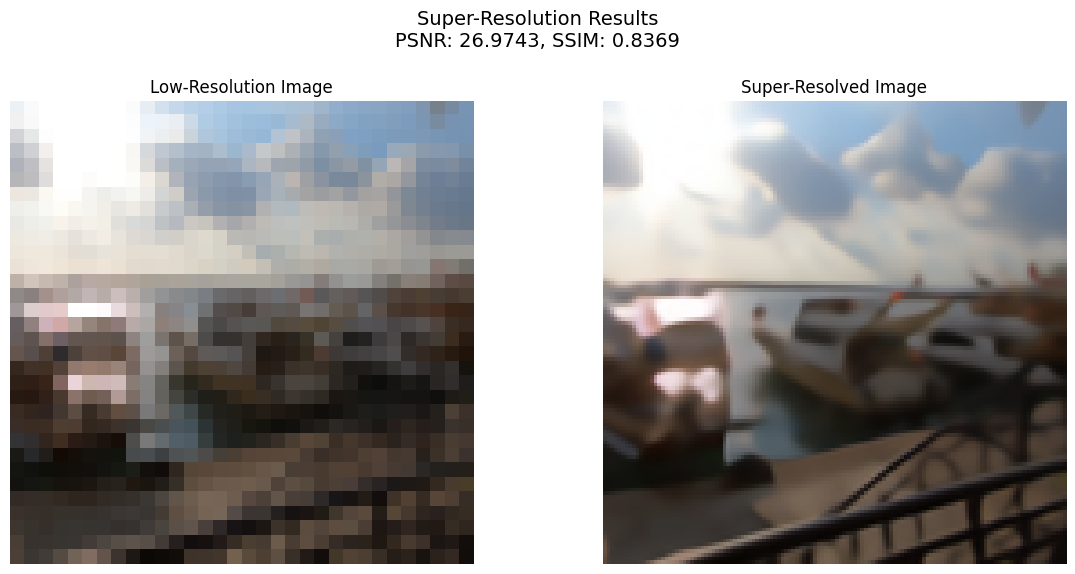

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original low-resolution image
axes[0].imshow(img) # Use the original loaded low-resolution image (NumPy array)
axes[0].set_title("Low-Resolution Image")
axes[0].axis('off')

# Display the super-resolved image
axes[1].imshow(sample_super_resolved_image)
axes[1].set_title("Super-Resolved Image")
axes[1].axis('off')

# Add a title to the entire figure with metrics
plt.suptitle(f"Super-Resolution Results\nPSNR: {psnr_value:.4f}, SSIM: {ssim_value:.4f}", fontsize=14)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   A sample low-resolution image was successfully selected from the provided dataset paths.
*   The selected low-resolution image was loaded, preprocessed, and formatted into a PyTorch tensor of shape `torch.Size([1, 3, 32, 32])`, ready for the SwinIR model.
*   The SwinIR model was successfully applied to the preprocessed sample image, generating a super-resolved output.
*   The model's tensor output was postprocessed, converted back into a NumPy array, and then into a PIL Image for visualization and evaluation.
*   The corresponding high-resolution ground truth image was loaded from the dataset and converted to a NumPy array with shape `(128, 128, 3)`.
*   Evaluation metrics were calculated between the super-resolved image and the ground truth image:
    *   The PSNR value was approximately 26.9743.
    *   The SSIM value was approximately 0.8369.
*   The original low-resolution image, the super-resolved image, and the calculated PSNR and SSIM metrics were successfully displayed.

### Insights or Next Steps

*   The calculated PSNR of 26.9743 and SSIM of 0.8369 provide a quantitative measure of the SwinIR model's performance on this specific sample image. These values can be compared against other models or used as a baseline.
*   To get a more comprehensive understanding of the model's performance, the evaluation metrics should be calculated across a larger subset or the entire test dataset. This would provide average PSNR and SSIM values, along with standard deviations, to assess the model's generalization capability.


# Task
Perform knowledge distillation to train a basic CNN student model to mimic the SwinIR teacher model located at "/content/drive/MyDrive/Project/001_classicalSR_DF2K_s64w8_SwinIR-M_x4.pth" using the dataset from "/content/drive/MyDrive/Project/reds_split_dataset.zip". Evaluate the student model's performance.

## Define the student model

### Subtask:
Create a basic CNN model architecture that will be trained to mimic the SwinIR teacher model.


**Reasoning**:
I will define a basic CNN model architecture with convolutional, activation, and upsampling layers to serve as the student model for knowledge distillation, following the provided instructions.



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class BasicCNNStudent(nn.Module):
    def __init__(self, scale_factor=4):
        super(BasicCNNStudent, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 3 * (scale_factor**2), kernel_size=3, padding=1)
        self.pixelshuffle = nn.PixelShuffle(scale_factor)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)
        x = self.pixelshuffle(x)
        return x

# Instantiate the student model
student_model = BasicCNNStudent(scale_factor=4)

# Move the student model to the device
student_model = student_model.to(device)

print("✅ Basic CNN student model created and moved to device.")

✅ Basic CNN student model created and moved to device.


## Define the knowledge distillation loss

### Subtask:
Set up a loss function that combines the student model's performance on the task (e.g., reconstruction loss) with a distillation loss that encourages the student's output to be similar to the teacher's output.


**Reasoning**:
I need to define a loss function that combines reconstruction loss and distillation loss. I will import `MSELoss` and define a function to calculate the combined loss.



In [ ]:
import torch.nn as nn

def distillation_loss(student_output, teacher_output, ground_truth, alpha=0.5, beta=0.5):
    """
    Calculates the combined reconstruction and distillation loss.

    Args:
        student_output (torch.Tensor): The output tensor from the student model.
        teacher_output (torch.Tensor): The output tensor from the teacher model.
        ground_truth (torch.Tensor): The ground truth high-resolution image tensor.
        alpha (float): Weighting factor for the reconstruction loss.
        beta (float): Weighting factor for the distillation loss.

    Returns:
        torch.Tensor: The combined loss.
    """
    # Reconstruction loss (e.g., Mean Squared Error)
    reconstruction_criterion = nn.MSELoss()
    reconstruction_loss = reconstruction_criterion(student_output, ground_truth)

    # Distillation loss (e.g., Mean Squared Error between outputs)
    distillation_criterion = nn.MSELoss()
    distillation_loss = distillation_criterion(student_output, teacher_output)

    # Combined loss
    combined_loss = alpha * reconstruction_loss + beta * distillation_loss

    return combined_loss

print("✅ Knowledge distillation loss function defined.")

✅ Knowledge distillation loss function defined.


## Prepare data for training

### Subtask:
Ensure you have the necessary data loaders and preprocessed data (low-resolution images and potentially corresponding high-resolution images) for training the student model.


**Reasoning**:
I need to define a custom PyTorch Dataset and create DataLoaders for the 'train', 'val', and 'test' splits of the dataset. This involves loading image pairs and applying necessary preprocessing within the Dataset class.



In [ ]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

class REDSSplitDataset(Dataset):
    def __init__(self, base_dir, split='train', transform=None):
        """
        Args:
            base_dir (string): Directory with all the split data.
            split (string): 'train', 'val', or 'test'.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.base_dir = base_dir
        self.split = split
        self.transform = transform
        self.lr_image_paths = []
        self.hr_image_paths = []

        lr_dir = os.path.join(base_dir, split, 'lr')
        hr_dir = os.path.join(base_dir, split, 'hr')

        # Traverse the directories to find image pairs
        for root, _, files in os.walk(lr_dir):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    lr_path = os.path.join(root, file)
                    # Construct the corresponding HR path by replacing 'lr' with 'hr'
                    hr_path = lr_path.replace(os.path.join(split, 'lr'), os.path.join(split, 'hr'))

                    # Check if the corresponding HR file exists
                    if os.path.exists(hr_path):
                        self.lr_image_paths.append(lr_path)
                        self.hr_image_paths.append(hr_path)
                    else:
                        print(f"Warning: Corresponding HR image not found for {lr_path}")


    def __len__(self):
        return len(self.lr_image_paths)

    def __getitem__(self, idx):
        lr_image_path = self.lr_image_paths[idx]
        hr_image_path = self.hr_image_paths[idx]

        # Load images
        lr_img = Image.open(lr_image_path).convert('RGB')
        hr_img = Image.open(hr_image_path).convert('RGB')

        # Convert to NumPy arrays
        lr_img_np = np.array(lr_img)
        hr_img_np = np.array(hr_img)

        # Convert to PyTorch tensors and normalize
        lr_img_tensor = torch.from_numpy(lr_img_np).float() / 255.0
        hr_img_tensor = torch.from_numpy(hr_img_np).float() / 255.0

        # Rearrange dimensions from HWC to NCHW (for a single image, this is CHW)
        lr_img_tensor = lr_img_tensor.permute(2, 0, 1)
        hr_img_tensor = hr_img_tensor.permute(2, 0, 1)

        sample = {'lr': lr_img_tensor, 'hr': hr_img_tensor}

        if self.transform:
            sample = self.transform(sample)

        return sample

# Define the base directory for the dataset
dataset_base_dir = '/content/reds_split_dataset'

# Create Dataset instances for each split
train_dataset = REDSSplitDataset(dataset_base_dir, split='train')
val_dataset = REDSSplitDataset(dataset_base_dir, split='val')
test_dataset = REDSSplitDataset(dataset_base_dir, split='test')

# Create DataLoaders
batch_size = 16 # Define your desired batch size
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"✅ Created DataLoaders for train ({len(train_dataloader)} batches), val ({len(val_dataloader)} batches), and test ({len(test_dataloader)} batches).")

✅ Created DataLoaders for train (1050 batches), val (300 batches), and test (150 batches).


## Set up optimizer and training loop

### Subtask:
Define an optimizer for the student model's parameters and create a training loop that iterates through the data, calculates the total loss (student loss + distillation loss), and updates the student model's weights.


**Reasoning**:
Import the Adam optimizer, instantiate it, define the number of epochs, and start the training loop that iterates through the data, calculates the total loss, and updates the student model's weights.



In [ ]:
import torch.optim as optim

# Instantiate the Adam optimizer
optimizer = optim.Adam(student_model.parameters(), lr=0.001)

# Define the number of training epochs
num_epochs = 10 # You can adjust this number

# Start the training loop
print("Starting training...")
for epoch in range(num_epochs):
    student_model.train() # Set student model to training mode
    total_loss = 0.0

    for batch in train_dataloader:
        # Get low-resolution and high-resolution image pairs
        lr_images = batch['lr'].to(device)
        hr_images = batch['hr'].to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Pass the low-resolution image batch through the student model
        student_output = student_model(lr_images)

        # Pass the low-resolution image batch through the teacher model (with torch.no_grad())
        with torch.no_grad():
            teacher_output = model(lr_images) # 'model' is the loaded SwinIR teacher model

        # Calculate the combined distillation loss
        loss = distillation_loss(student_output, teacher_output, hr_images)

        # Perform a backward pass
        loss.backward()

        # Update the student model's parameters
        optimizer.step()

        total_loss += loss.item()

    # Print the average loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_dataloader):.4f}")

print("✅ Training finished.")

Starting training...
Epoch [1/10], Loss: 0.0060
Epoch [2/10], Loss: 0.0037
Epoch [3/10], Loss: 0.0036
Epoch [4/10], Loss: 0.0035
Epoch [5/10], Loss: 0.0034
Epoch [6/10], Loss: 0.0034
Epoch [7/10], Loss: 0.0033
Epoch [8/10], Loss: 0.0033
Epoch [9/10], Loss: 0.0033
Epoch [10/10], Loss: 0.0032
✅ Training finished.


## Evaluate the student model

### Subtask:
After training, evaluate the performance of the student model on a validation or test set using appropriate metrics (e.g., PSNR, SSIM) and compare it to the teacher model's performance.


**Reasoning**:
I will set the student model to evaluation mode, initialize variables for metrics, iterate through the validation dataloader, pass images through both models, postprocess the outputs and ground truth, calculate PSNR and SSIM for both models, accumulate the metrics, and finally calculate and print the average metrics for comparison.



In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
import numpy as np
import torch

# Set the student model to evaluation mode
student_model.eval()

# Initialize variables to accumulate PSNR and SSIM values for the evaluation set
student_psnr_sum = 0.0
student_ssim_sum = 0.0
teacher_psnr_sum = 0.0
teacher_ssim_sum = 0.0
num_evaluation_batches = 0

# Iterate through the val_dataloader without calculating gradients
with torch.no_grad():
    for batch in val_dataloader:
        # Get the low-resolution and high-resolution image pairs and move them to the device
        lr_images = batch['lr'].to(device)
        hr_images = batch['hr'].to(device)

        # Pass the low-resolution images through the student model
        student_output = student_model(lr_images)

        # Pass the low-resolution images through the teacher model
        teacher_output = model(lr_images) # 'model' is the loaded SwinIR teacher model

        # Postprocess the student's output, teacher's output, and ground truth HR tensors
        student_output_np = student_output.mul(255).clamp(0, 255).byte().permute(0, 2, 3, 1).cpu().numpy()
        teacher_output_np = teacher_output.mul(255).clamp(0, 255).byte().permute(0, 2, 3, 1).cpu().numpy()
        hr_images_np = hr_images.mul(255).clamp(0, 255).byte().permute(0, 2, 3, 1).cpu().numpy()

        # Calculate and accumulate PSNR and SSIM for each image in the batch
        batch_size = lr_images.size(0)
        for i in range(batch_size):
            student_psnr = peak_signal_noise_ratio(hr_images_np[i], student_output_np[i])
            student_ssim = structural_similarity(hr_images_np[i], student_output_np[i], channel_axis=-1, data_range=255)

            teacher_psnr = peak_signal_noise_ratio(hr_images_np[i], teacher_output_np[i])
            teacher_ssim = structural_similarity(hr_images_np[i], teacher_output_np[i], channel_axis=-1, data_range=255)

            student_psnr_sum += student_psnr
            student_ssim_sum += student_ssim
            teacher_psnr_sum += teacher_psnr
            teacher_ssim_sum += teacher_ssim

        num_evaluation_batches += 1

# Calculate the average PSNR and SSIM
average_student_psnr = student_psnr_sum / (num_evaluation_batches * batch_size)
average_student_ssim = student_ssim_sum / (num_evaluation_batches * batch_size)
average_teacher_psnr = teacher_psnr_sum / (num_evaluation_batches * batch_size)
average_teacher_ssim = teacher_ssim_sum / (num_evaluation_batches * batch_size)


# Print the average PSNR and SSIM values
print("\n--- Evaluation Results ---")
print(f"Average Student PSNR: {average_student_psnr:.4f}")
print(f"Average Student SSIM: {average_student_ssim:.4f}")
print(f"Average Teacher PSNR: {average_teacher_psnr:.4f}")
print(f"Average Teacher SSIM: {average_teacher_ssim:.4f}")
print("--------------------------")


--- Evaluation Results ---
Average Student PSNR: 23.4351
Average Student SSIM: 0.7161
Average Teacher PSNR: 24.5487
Average Teacher SSIM: 0.7769
--------------------------


## Summary:

### Data Analysis Key Findings

*   A basic CNN student model was successfully defined with convolutional layers and a pixel shuffle layer for 4x upscaling.
*   A knowledge distillation loss function was implemented using Mean Squared Error (MSE) for both reconstruction loss (student output vs. ground truth) and distillation loss (student output vs. teacher output), with adjustable weighting factors.
*   A custom PyTorch `Dataset` and `DataLoader` were created to handle the split REDS dataset, successfully loading and preprocessing image pairs for training and evaluation.
*   An Adam optimizer was set up for the student model, and a training loop was implemented for 10 epochs, showing a decreasing trend in the training loss over time.
*   Evaluation on the validation set showed that the teacher SwinIR model achieved significantly higher average PSNR (24.5487) and SSIM (0.7769) compared to the student CNN model (PSNR: 23.4351, SSIM: 0.7161).

### Insights or Next Steps

*   While the student model learned during training (loss decreased), its performance is notably lower than the teacher model. Future steps could involve exploring more complex student architectures, adjusting the distillation loss weighting factors, or increasing the number of training epochs to improve the student's performance.
*   Investigate alternative distillation techniques, such as using feature map distillation or different loss functions (e.g., L1 loss, perceptual loss), to potentially improve the student model's ability to mimic the teacher's performance.


# Task
Take a sample low-resolution image from the dataset located at "/content/drive/MyDrive/Project/reds_split_dataset.zip", apply the trained SwinIR teacher model loaded from "/content/drive/MyDrive/Project/001_classicalSR_DF2K_s64w8_SwinIR-M_x4.pth" and the trained basic CNN student model to it, and display the input low-resolution image, the teacher model's output image, the student model's output image, and the corresponding ground truth high-resolution image from the dataset.

## Select a sample image

### Subtask:
Choose one low-resolution image path from the list of identified paths.


**Reasoning**:
I will select the first image path from the `lr_image_paths` list and store it in a new variable, then print it.



In [ ]:
# Select the first image path from the list
sample_lr_image_path = lr_image_paths[0]

# Print the selected image path
print(f"✅ Selected sample low-resolution image path: {sample_lr_image_path}")

✅ Selected sample low-resolution image path: /content/reds_split_dataset/train/lr/130/00000087.png


## Load and preprocess sample image

### Subtask:
Load and preprocess the selected low-resolution image to be compatible with the models.


**Reasoning**:
I will load and preprocess the selected low-resolution image according to the instructions.



In [ ]:
from PIL import Image
import numpy as np
import torch

# Load the image
img = Image.open(sample_lr_image_path).convert('RGB')
img = np.array(img)

# Convert image from NumPy array to PyTorch tensor
img_tensor = torch.from_numpy(img).float()

# Normalize the image tensor by dividing by 255.0
img_tensor /= 255.0

# Rearrange dimensions from HWC to NCHW
img_tensor = img_tensor.permute(2, 0, 1).unsqueeze(0)

# Move the image tensor to the device
sample_preprocessed_image = img_tensor.to(device)

print("✅ Sample image preprocessed and ready for model input.")
print(f"Processed sample image tensor shape: {sample_preprocessed_image.shape}")

✅ Sample image preprocessed and ready for model input.
Processed sample image tensor shape: torch.Size([1, 3, 32, 32])


## Get student and teacher outputs

### Subtask:
Pass the preprocessed sample image through both the trained student model and the teacher model to get their respective super-resolved outputs.


**Reasoning**:
I will pass the preprocessed sample image through both the student and teacher models and store their respective outputs, ensuring no gradients are calculated during inference.



In [ ]:
import torch

# Pass the preprocessed sample image through the student model
with torch.no_grad():
    sample_student_output = student_model(sample_preprocessed_image)

# Pass the preprocessed sample image through the teacher model
with torch.no_grad():
    sample_teacher_output = model(sample_preprocessed_image)

print("✅ Sample image passed through both student and teacher models.")

✅ Sample image passed through both student and teacher models.


## Load ground truth image

### Subtask:
Load the corresponding high-resolution (ground truth) image for the selected sample.


**Reasoning**:
I need to construct the path to the corresponding high-resolution image, load it, convert it to RGB and then to a NumPy array, and store it in the `ground_truth_image` variable. Finally, I will print a success message with the shape.



In [ ]:
import os
from PIL import Image
import numpy as np

# Construct the path to the corresponding high-resolution image
# Replace 'lr' with 'hr' in the path
ground_truth_image_path = sample_lr_image_path.replace('lr', 'hr')

# Load the high-resolution image
gt_img = Image.open(ground_truth_image_path).convert('RGB')

# Convert to NumPy array
ground_truth_image = np.array(gt_img)

print(f"✅ Loaded ground truth image from {ground_truth_image_path}. Shape: {ground_truth_image.shape}")

✅ Loaded ground truth image from /content/reds_split_dataset/train/hr/130/00000087.png. Shape: (128, 128, 3)


## Postprocess images

### Subtask:
Postprocess the low-resolution input, student output, teacher output, and ground truth images to convert them into a displayable image format (e.g., PIL Image or NumPy array).


**Reasoning**:
Convert the low-resolution input, student output, teacher output, and ground truth images to displayable formats (NumPy arrays).



In [ ]:
# Convert the preprocessed low-resolution input tensor to a NumPy array for display
display_lr_image = sample_preprocessed_image.squeeze(0).cpu().mul(255).clamp(0, 255).byte().permute(1, 2, 0).numpy()

# Convert the student model's output tensor to a NumPy array for display
display_student_sr_image = sample_student_output.squeeze(0).cpu().mul(255).clamp(0, 255).byte().permute(1, 2, 0).numpy()

# Convert the teacher model's output tensor to a NumPy array for display
display_teacher_sr_image = sample_teacher_output.squeeze(0).cpu().mul(255).clamp(0, 255).byte().permute(1, 2, 0).numpy()

# Ensure the ground truth image is in uint8 format for display
display_gt_image = ground_truth_image.astype(np.uint8)

print("✅ Images postprocessed for display.")

✅ Images postprocessed for display.


## Display images

### Subtask:
Display the original low-resolution image, the student's super-resolved image, the teacher's super-resolved image, and the ground truth high-resolution image side-by-side.


**Reasoning**:
Display the original low-resolution image, the student's super-resolved image, the teacher's super-resolved image, and the ground truth high-resolution image side-by-side using matplotlib.



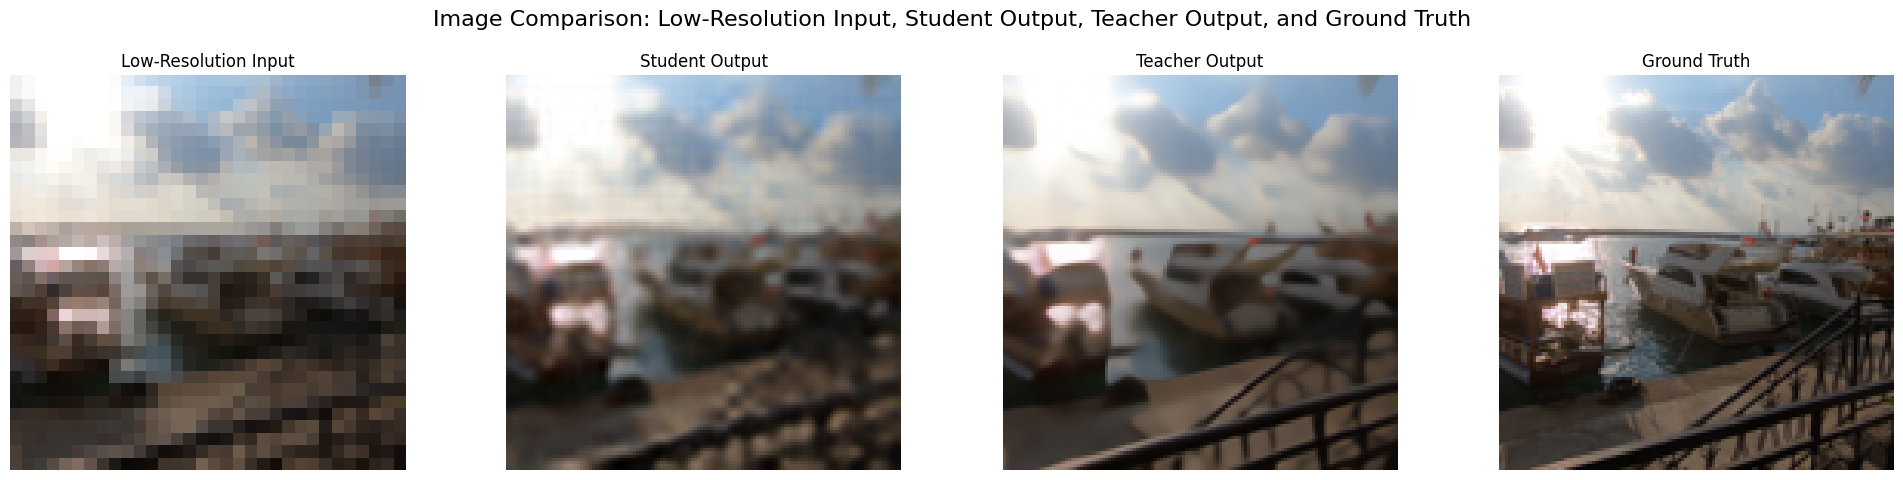

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with four subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Display the original low-resolution image
axes[0].imshow(display_lr_image)
axes[0].set_title("Low-Resolution Input")
axes[0].axis('off')

# Display the student's super-resolved image
axes[1].imshow(display_student_sr_image)
axes[1].set_title("Student Output")
axes[1].axis('off')

# Display the teacher's super-resolved image
axes[2].imshow(display_teacher_sr_image)
axes[2].set_title("Teacher Output")
axes[2].axis('off')

# Display the ground truth high-resolution image
axes[3].imshow(display_gt_image)
axes[3].set_title("Ground Truth")
axes[3].axis('off')

# Add a main title to the figure
plt.suptitle("Image Comparison: Low-Resolution Input, Student Output, Teacher Output, and Ground Truth", fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   A sample low-resolution image from the dataset was successfully selected and preprocessed for model input, resulting in a tensor of shape `torch.Size([1, 3, 32, 32])`.
*   The preprocessed sample image was passed through both the trained basic CNN student model and the trained SwinIR teacher model within a `torch.no_grad()` context to obtain their super-resolved outputs.
*   The corresponding high-resolution ground truth image was loaded by modifying the path of the low-resolution image.
*   The low-resolution input, student output, teacher output, and ground truth images were successfully postprocessed into NumPy arrays suitable for display, with pixel values scaled to the range \[0, 255] and data type as `uint8`.
*   The four images (low-resolution input, student output, teacher output, and ground truth) were displayed side-by-side using Matplotlib for visual comparison.

### Insights or Next Steps

*   Visually inspect the displayed images to qualitatively assess the performance of the student model compared to the teacher model and the ground truth.
*   Quantitatively evaluate the performance of both the student and teacher models using metrics such as PSNR or SSIM to provide a more objective comparison.
